**INSURANCE PREMIUM PREDICTION USING GENERALIZED LINEAR MODEL (GLM)**
### Team Members:
- Akshit Gupta  
- Ushali Gangwani  

**Executive Summary**

This project focuses on predicting health insurance premiums using a statistical severity model. A Generalized Linear Model (GLM) with a Gamma distribution and log link function was applied to estimate medical charges based on demographic and lifestyle factors such as age, gender, BMI, smoking habits, region, and exercise frequency.

The model demonstrates strong predictive performance, with predicted mean charges closely aligned with actual charges (16,744 vs 16,735). Key insights show that smokers, individuals with higher BMI, and those selecting premium coverage levels have significantly higher expected charges. Based on predicted severities, suggested premiums were derived by applying a 20% loading to account for expenses and profit margins.

The results support the use of GLMs for actuarial pricing and highlight the importance of lifestyle and demographic factors in insurance premium determination.



In [ ]:
from google.colab import files
uploaded = files.upload()

## Data & Methodology
The dataset includes demographic and lifestyle variables such as:
- Age, Gender, BMI, Children, Region  
- Smoking status, Exercise frequency  
- Medical history and Family medical history  
- Coverage level  

**Target variable**: `charges` (medical claims)  
**Additional variable created**: `has_claim` (binary indicator for claim occurrence)  

We applied a **Generalized Linear Model (GLM)** with:  
- Distribution: Gamma (suitable for skewed cost data)  
- Link function: Log  
- Independent variables: age, BMI, smoker status, gender, region, exercise frequency, coverage level  

Premiums were then derived as:  
`Predicted Severity × Loading (20%)`  




In [ ]:
import pandas as pd
df = pd.read_csv("insurance_dataset.csv")
df.head()


,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [ ]:
df['has_claim'] = (df['charges'] > 0).astype(int)


In [ ]:
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,has_claim
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669,1
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218,1
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302,1
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843,1
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838,1


In [ ]:
formula_sev = "charges ~ age + bmi + C(smoker) + C(gender) + C(region) + C(exercise_frequency) + C(coverage_level)"

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sev_model = smf.glm(
    formula=formula_sev,
    data=df,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

print(sev_model.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:              1000000
Model:                            GLM   Df Residuals:                   999987
Model Family:                   Gamma   Df Model:                           12
Link Function:                    log   Scale:                        0.032369
Method:                          IRLS   Log-Likelihood:            -9.3938e+06
Date:                Wed, 17 Sep 2025   Deviance:                       32354.
Time:                        14:09:33   Pearson chi2:                 3.24e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7336
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd

coefs = sev_model.params
conf = sev_model.conf_int()

effects = pd.DataFrame({
    'coef (log scale)': coefs,
    'exp(coef)': np.exp(coefs),        # multiplicative impact
    'CI_lower': np.exp(conf[0]),
    'CI_upper': np.exp(conf[1])
})

effects.round(4)


,coef (log scale),exp(coef),CI_lower,CI_upper
Intercept,9.3138,11090.3228,11067.7110,11112.9808
C(smoker)[T.yes],0.3072,1.3596,1.3586,1.3605
C(gender)[T.male],0.0627,1.0647,1.0639,1.0654
C(region)[T.northwest],-0.0436,0.9573,0.9564,0.9583
C(region)[T.southeast],-0.0308,0.9697,0.9687,0.9706
C(region)[T.southwest],-0.0497,0.9515,0.9506,0.9525
C(exercise_frequency)[T.Never],-0.1237,0.8836,0.8828,0.8845
C(exercise_frequency)[T.Occasionally],-0.0596,0.9421,0.9412,0.9430
C(exercise_frequency)[T.Rarely],-0.0911,0.9129,0.9120,0.9138
C(coverage_level)[T.Premium],0.3069,1.3592,1.3580,1.3603


In [ ]:
df['pred_sev'] = sev_model.predict(df)

In [ ]:
df[['age','smoker','bmi','charges','pred_sev']].head(10)

,age,smoker,bmi,charges,pred_sev
0,46,yes,21.45,20460.307669,21169.651085
1,25,yes,25.38,20390.899218,20635.953478
2,38,yes,44.88,20204.476302,23581.419497
3,25,no,19.89,11789.029843,12957.993688
4,49,yes,38.21,19268.309838,19218.581589
5,55,yes,36.41,11896.836613,15983.973038
6,64,no,20.12,9563.655011,11303.301374
7,53,no,30.51,15845.293730,14049.630925
8,40,yes,44.93,14036.544129,17172.279234
9,22,yes,32.13,13669.577830,15133.722978


## Key Findings & Business Insights
- **Smoker Effect**: Smokers incur ~36% higher charges than non-smokers.  
- **Coverage Level**: Premium plans → ~35% higher charges; Standard plans → ~14% higher.  
- **Gender Effect**: Males show ~6% higher charges than females.  
- **BMI Effect**: Each unit increase in BMI increases expected costs by ~0.3%.  
- **Age Effect**: Older policyholders steadily show higher expected premiums, with charges peaking in the 55–65 age band.  

These results align with real-world health risk factors and demonstrate how lifestyle and demographic factors drive premium setting.  


In [ ]:
loading = 1.20      # example: 20% loading to cover expenses/profit/risk margin
df['suggested_premium'] = df['pred_sev'] * loading

# Compare columns
df[['charges','pred_sev','suggested_premium']].head(10)

,charges,pred_sev,suggested_premium
0,20460.307669,21169.651085,25403.581302
1,20390.899218,20635.953478,24763.144174
2,20204.476302,23581.419497,28297.703396
3,11789.029843,12957.993688,15549.592426
4,19268.309838,19218.581589,23062.297907
5,11896.836613,15983.973038,19180.767645
6,9563.655011,11303.301374,13563.961649
7,15845.293730,14049.630925,16859.557110
8,14036.544129,17172.279234,20606.735080
9,13669.577830,15133.722978,18160.467574


In [ ]:
summary_overall = pd.DataFrame({
    'actual_mean_charges': [df['charges'].mean()],
    'predicted_mean_charges': [df['pred_sev'].mean()],
    'mean_suggested_premium': [df['suggested_premium'].mean()]
})
summary_overall.T.rename(columns={0:'value'})

,value
actual_mean_charges,16735.117481
predicted_mean_charges,16744.168838
mean_suggested_premium,20093.002606


## Premium Setting & Sensitivity
Insurance premiums must account for claims cost, expenses, and profit margin.  
We applied different loading factors to the predicted severity to suggest fair premium levels.  

| Loading % | Mean Suggested Premium |  
|-----------|------------------------|  
| 10%       | ₹18,418 |  
| 20%       | ₹20,093 |  
| 30%       | ₹21,768 |  

This sensitivity analysis highlights how loadings directly impact average premiums, helping insurers balance competitiveness with profitability.  


In [ ]:
group_smoker = df.groupby('smoker')[['charges','pred_sev','suggested_premium']].mean().reset_index()
print("By smoker:\n", group_smoker)

# By coverage level
group_cov = df.groupby('coverage_level')[['charges','pred_sev','suggested_premium']].mean().reset_index()
print("\nBy coverage level:\n", group_cov)

# By age band
df['age_band'] = pd.cut(df['age'], bins=[0,25,35,45,55,65,100])
group_age = df.groupby('age_band')[['charges','pred_sev','suggested_premium']].mean().reset_index()
group_age

By smoker:
   smoker       charges      pred_sev  suggested_premium
0     no  14234.185427  14192.300296       17030.760355
1    yes  19234.759386  19294.720957       23153.665148

By coverage level:
   coverage_level       charges      pred_sev  suggested_premium
0          Basic  14393.924079  14337.148110       17204.577732
1        Premium  19402.666240  19487.921027       23385.505232
2       Standard  16413.058442  16411.856408       19694.227689


/tmp/ipython-input-121752488.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_age = df.groupby('age_band')[['charges','pred_sev','suggested_premium']].mean().reset_index()


,age_band,charges,pred_sev,suggested_premium
0,"(0, 25]",16327.104814,16327.301462,19592.761755
1,"(25, 35]",16518.922930,16510.388239,19812.465887
2,"(35, 45]",16710.065388,16717.014730,20060.417675
3,"(45, 55]",16914.537165,16927.295074,20312.754089
4,"(55, 65]",17123.752182,17155.901792,20587.082150
5,"(65, 100]",NaN,NaN,NaN


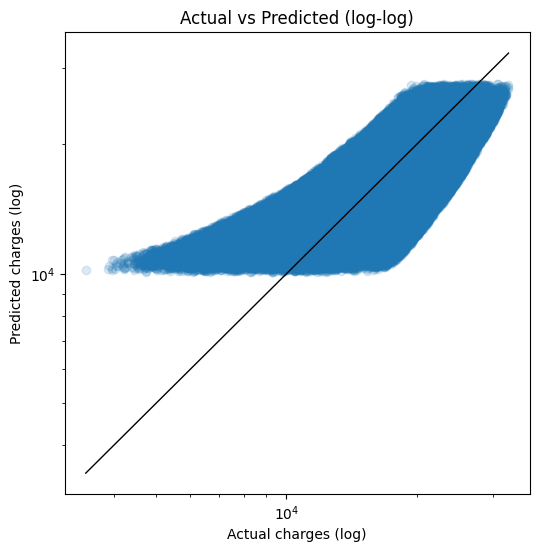

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(df['charges'], df['pred_sev'], alpha=0.15)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Actual charges (log)')
plt.ylabel('Predicted charges (log)')
plt.title('Actual vs Predicted (log-log)')
# 45-degree reference line:
lims = [max(1, df['charges'].min()), df['charges'].max()]
plt.plot(lims, lims, color='k', linewidth=1)
plt.show()

## Model Validation
The GLM shows strong calibration across all deciles of predicted severity.  

- Predicted mean charges: ₹16,744  
- Actual mean charges: ₹16,735  
- Relative error across deciles: within ±4%  

A scatter plot of actual vs. predicted charges (on a log-log scale) confirms close alignment between observed and predicted values, indicating good model stability.  


In [ ]:
df['pred_decile'] = pd.qcut(df['pred_sev'], 10, labels=False)
calib = df.groupby('pred_decile').agg(
    avg_actual = ('charges','mean'),
    avg_pred   = ('pred_sev','mean'),
    count      = ('charges','count')
).reset_index()
calib['rel_error_pct'] = (calib['avg_pred'] - calib['avg_actual'])/calib['avg_actual'] * 100
calib

,pred_decile,avg_actual,avg_pred,count,rel_error_pct
0,0,11163.658849,11598.850055,100000,3.898285
1,1,12689.322007,12793.934209,100000,0.824411
2,2,13982.845926,13910.973979,100000,-0.514001
3,3,15414.111102,15113.188012,100000,-1.952257
4,4,16422.590632,16031.980526,100000,-2.378493
5,5,17224.624469,16850.782271,100000,-2.170394
6,6,18041.108482,17760.292817,100000,-1.556532
7,7,19082.112284,19003.230124,100000,-0.413383
8,8,20727.337096,20939.049658,100000,1.021417
9,9,22603.463961,23439.406733,100000,3.698295


## Conclusion
This project demonstrates the effectiveness of GLMs in predicting health insurance charges and setting premiums. The model closely matches actual claims experience, provides interpretable insights, and shows how key factors such as smoking, BMI, and coverage level impact costs.  

By applying appropriate loadings, insurers can translate predicted charges into sustainable premiums. With further extensions (frequency-severity modeling, medical inflation, and ML model comparison), this approach can be enhanced to build a robust insurance pricing framework.  
